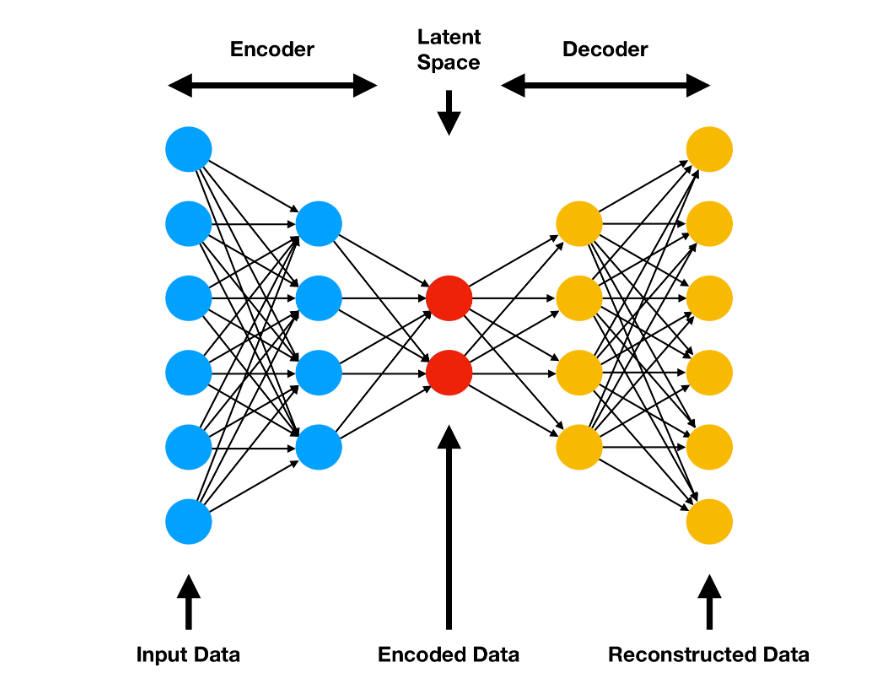

### OBJECTIVE:

This Neural Networks project aims at exploring the functionality of AutoEncoders for applications like Noise reduction and Image Re-construction.

The main objective of this project is to understand if the Neural network is capable to recognize the important pixelated elements which contribute towards the object in focus and retain its detail and properties.

We also try to add in noise to distort the image further in order to test its pattern recognition properties.


### Dataset information:

The MNIST dataset is a well-known dataset in the field of machine learning and computer vision. It is widely used for various tasks, particularly for training and evaluating models related to image classification and digit recognition. Here are the key characteristics of the MNIST dataset:

1. Image Size: All images in the MNIST dataset are grayscale and have a fixed size of 28x28 pixels. This consistent size simplifies preprocessing and model development.

2. Digits: MNIST primarily consists of images of handwritten digits (0-9). Each image represents a single digit written by various individuals. This dataset is particularly useful for digit recognition tasks and as a starting point for more complex character recognition or handwriting analysis projects.

3. Sample Size: The dataset contains a total of 70,000 images. These images are split into two main subsets: a training set of 60,000 images and a testing set of 10,000 images. This division allows for model training and evaluation.

4. Labeling: Each image is associated with a corresponding label, which is an integer between 0 and 9. These labels indicate the digit that is represented in the image. Labeling makes the MNIST dataset suitable for supervised learning tasks, where the goal is to train a model to predict these labels.

5. Real-World Handwriting: The dataset features images of handwritten digits from a wide range of sources, making it more representative of real-world variations in handwriting styles and quality.

6. Balance: The MNIST dataset is reasonably balanced, meaning that there is a roughly equal distribution of samples across the ten digit classes (0-9). This balance ensures that models are trained on a diverse set of examples for each digit.

7. Clean and Preprocessed: MNIST is known for being a clean and well-preprocessed dataset. The images are centered and normalized, making them suitable for training and evaluating a variety of machine learning models. This characteristic simplifies the initial stages of data preprocessing.

### 1. Importing Necessary libraries

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() #load Mnist dataset

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
28*28 #No. of pixels per image

784

In [ ]:
784/2 # Lets reduce the dimensions slowly by dividing approximately by 2

392.0

## Task 1:

### 1.Creating Neural Network model

In [ ]:
#Stacked AutoEncoder -
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation = 'relu'))
encoder.add(Dense(200,activation = 'relu'))
encoder.add(Dense(100,activation = 'relu'))
encoder.add(Dense(50,activation = 'relu'))
encoder.add(Dense(25,activation = 'relu'))

In [ ]:
decoder = Sequential() #Decoder is reverse of encoder
decoder.add(Dense(50,activation = 'relu',input_shape=[25]))
decoder.add(Dense(100,activation = 'relu'))
decoder.add(Dense(200,activation = 'relu'))
decoder.add(Dense(400,activation = 'relu'))
decoder.add(Dense(28*28,activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
#Compiling the model
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=1.5),
                   metrics = ['accuracy'])

### 2. Fitting model to data

In [ ]:
#Fitting the model to the data-
autoencoder.fit(X_train,X_train,epochs =5,validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2541 - accuracy: 0.0815 - val_loss: 0.2215 - val_accuracy: 0.1096
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1957 - accuracy: 0.1457 - val_loss: 0.1720 - val_accuracy: 0.1716
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1653 - accuracy: 0.1845 - val_loss: 0.1564 - val_accuracy: 0.1893
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1533 - accuracy: 0.2027 - val_loss: 0.1465 - val_accuracy: 0.2120
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1447 - accuracy: 0.2167 - val_loss: 0.1404 - val_accuracy: 0.2167


### 3.Getting predictions-

In [ ]:
#Getting the model to predict for new set of images
passed_images = autoencoder.predict(X_test[:10]) #batchsize of 10 images

1/1 [==============================] - 0s 260ms/step


### 4.Visualising outputs -

Original image


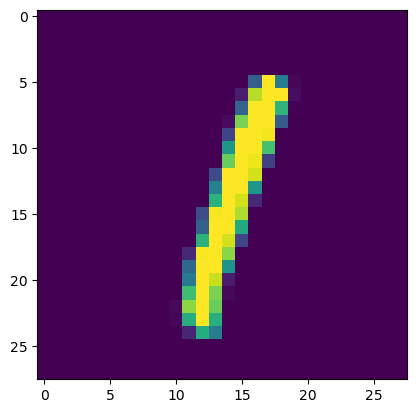

Attempted Reconstruction (after Autoencoder)


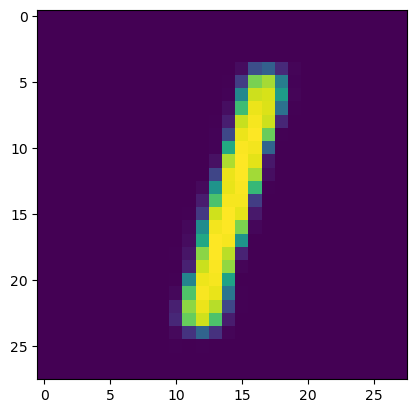

In [ ]:
#Visualising outputs

n = 5

print('Original image')
plt.imshow(X_test[n])
plt.plot()
plt.show()
print('Attempted Reconstruction (after Autoencoder)')
plt.imshow(passed_images[n])


#### Insight:
1. We can observe here that the image was perfectly reconstructed even after the encoder contributed to significant reduction in dimensionality. Furthermore, the decoder was able to successfully reconstruct and expand the image back without losing the subject composition

## Task 2 :
Adding noise to images to check capability of autoencoder for noise filtering.

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[:10],training = True)

Original image


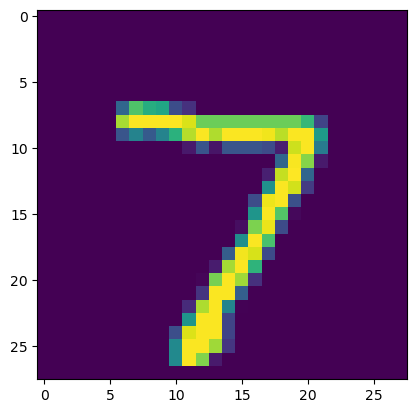

Noisey image


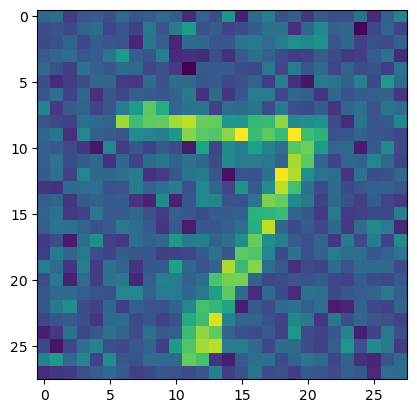

In [ ]:
#Visualising test images

n = 0

print('Original image')
plt.imshow(X_test[n])
plt.plot()
plt.show()
print('Noisey image')
plt.imshow(noisey[n])

In [ ]:
import tensorflow as tf
import random

### 1. Creating Neural Network model -

In [ ]:
#using the same encoder and decoder as created earlier

#Encoder -
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(GaussianNoise(0.2))
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation = 'relu'))
encoder.add(Dense(200,activation = 'relu'))
encoder.add(Dense(100,activation = 'relu'))
encoder.add(Dense(50,activation = 'relu'))
encoder.add(Dense(25,activation = 'relu'))

In [ ]:
decoder = Sequential() #Decoder is reverse of encoder
decoder.add(Dense(50,activation = 'relu',input_shape=[25]))
decoder.add(Dense(100,activation = 'relu'))
decoder.add(Dense(200,activation = 'relu'))
decoder.add(Dense(400,activation = 'relu'))
decoder.add(Dense(28*28,activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
noise_remover = Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(optimizer = 'adam',loss = 'binary_crossentropy')

### 2.Fitting the model to the data -

In [ ]:
noise_remover.fit(X_train,X_train,epochs = 8,validation_data=[X_test,X_test])

Epoch 1/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1328 - val_loss: 0.1262
Epoch 2/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1261 - val_loss: 0.1203
Epoch 3/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1202 - val_loss: 0.1152
Epoch 4/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1165 - val_loss: 0.1123
Epoch 5/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1140 - val_loss: 0.1106
Epoch 6/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1121 - val_loss: 0.1095
Epoch 7/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1106 - val_loss: 0.1076
Epoch 8/8
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1090 - val_loss: 0.1056


In [ ]:
ten_noisey_images = sample(X_test[:10],training = True)

In [ ]:
de_noised = noise_remover(ten_noisey_images)

original image


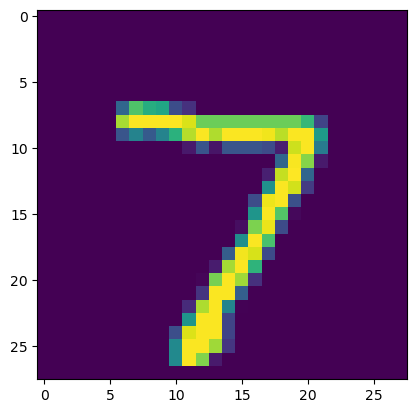

Noisey image


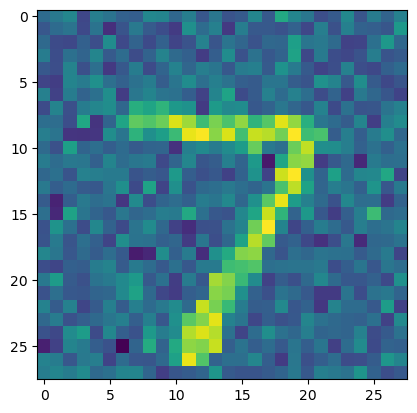

Reconstructed image


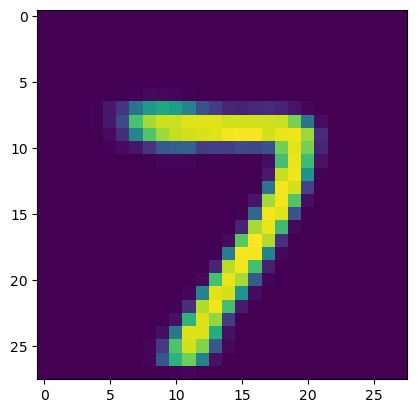

In [ ]:
#Visualising output -

n = 0

print('original image')
plt.imshow(X_test[n])
plt.plot()
plt.show()
print('Noisey image')
plt.imshow(ten_noisey_images[n])
plt.show()
print('Reconstructed image')
plt.imshow(de_noised[n])
plt.show()


## Conclusions -

1. Based on the above test conditions we can observe AutoEncoders perform brilliantly in understanding the features of the image.

2. We could test dimensionality reduction where the auto encoder successfully recognized and retained important characteristics of the image even after encoding the features from 728 to 25 and decoding back to 728.

3. It was also observed that the Autoencoder was able to recognize noise introduced to the image and reconstruct the image without noise.